In [1]:
from elegantIO import elegantLatticeFile
from elegantIO import elegantCommandFile
from elegantIO import elegant_findtwiss
from elegantIO import elegant_track
import matplotlib.pyplot as plt

In [11]:
acc_example=elegantLatticeFile()
acc_example.addElement('D1', 'DRIF', l=0.5)
acc_example.addElement('Q1', 'KQUAD', l=0.5, K1=0.5)
acc_example.addElement('Q2', 'KQUAD', l=0.5, K1=-0.5)
acc_example.addElement('R1', 'RFCA', l=1, phase=60, volt=3e6, change_p0=0, 
                       end1_focus=1, end2_focus=1, BODY_FOCUS_MODEL = 'SRS')
acc_example.addElement('DD', 'DRIF', l=1)

acc_example.appendToBeamline('DBL', 'D1', 'Q1', 'D1' ,'Q2','D1','DD')
acc_example.appendToBeamline('BL1', 'D1', 'Q1', 'D1' ,'Q2','D1','R1')
for i in range(10):
    acc_example.appendToBeamline('linac', 'BL1')
    



In [14]:
matched_list,_=elegant_findtwiss(acc_example, 'DBL', matched=1)
initial_optics = matched_list[[1,2,4,5,6,7,9,10],-1]
twiss,_=elegant_findtwiss(acc_example, 'linac', gamma0=20, initial_optics=initial_optics)
cen,sig=elegant_track(acc_example, 'linac',gamma0=20, initial_optics=initial_optics, Npar=1000, emit_x=1e-6, emit_y=1e-6)

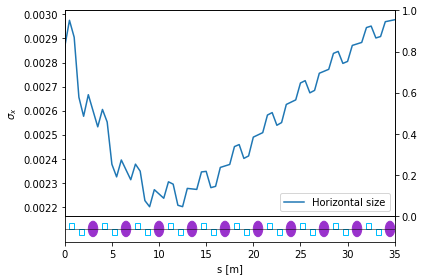

In [15]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
acc_example.plotBeamline(ax2)

ax1.plot(sig[0], sig[1], label='Horizontal size')
ax1_m=ax1.twinx()
ax1
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\sigma_x$')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)